#Классификация по тональности

В этом домашнем задании вам предстоит классифицировать по тональности отзывы на банки с сайта banki.ru.

Данные содержат непосредственно тексты отзывов, некоторую дополнительную информацию, а также оценку по шкале от 1 до 5.

Тексты хранятся в json-ах в массиве responses.

In [ ]:
import pandas as pd
import json
import bz2
from tqdm import tqdm

In [ ]:
with bz2.open('banki_responses.json.bz2', 'rt', encoding='utf-8') as f:
  json_df = pd.read_json(f, lines=True)

In [ ]:
json_df.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0


In [ ]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201030 entries, 0 to 201029
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                185492 non-null  object        
 1   rating_not_checked  201030 non-null  bool          
 2   title               201030 non-null  object        
 3   num_comments        201030 non-null  int64         
 4   bank_license        201026 non-null  object        
 5   author              201009 non-null  object        
 6   bank_name           201030 non-null  object        
 7   datetime            201030 non-null  datetime64[ns]
 8   text                201030 non-null  object        
 9   rating_grade        136189 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.0+ MB


сократим датафрейм до 10000 строк, так ограничены вычислительные ресурсы

In [ ]:
json_df = json_df.iloc[:10000]

In [ ]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                10000 non-null  object        
 1   rating_not_checked  10000 non-null  bool          
 2   title               10000 non-null  object        
 3   num_comments        10000 non-null  int64         
 4   bank_license        9997 non-null   object        
 5   author              10000 non-null  object        
 6   bank_name           10000 non-null  object        
 7   datetime            10000 non-null  datetime64[ns]
 8   text                10000 non-null  object        
 9   rating_grade        6020 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 713.0+ KB


## Часть 1. Анализ текстов
**1) Посчитайте количество отзывов в разных городах и на разные банки**

In [ ]:
df_count = json_df[['city','bank_name','text']].groupby(['city','bank_name']).count()

In [ ]:
df_count

,,text
city,bank_name,
г. 1-е Иткулово,Сбербанк России,1
г. Cанкт-Петербург,Русский Стандарт,1
г. Cочи,Сбербанк России,2
г. Cургут,Сбербанк России,1
г. Абакан,Азиатско-Тихоокеанский Банк,1
...,...,...
г. совхоз Серп и Молот,Хоум Кредит Банк,1
г. сочи,Сбербанк России,1
г. таганрог,Сбербанк России,1


**2) Постройте гистограмы длин слов в символах и в словах**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [ ]:
# добавляем в массив длину каждого слова
count_word = []
for i in json_df['text']:
  for j in i.split():
    count_word.append(len(j))


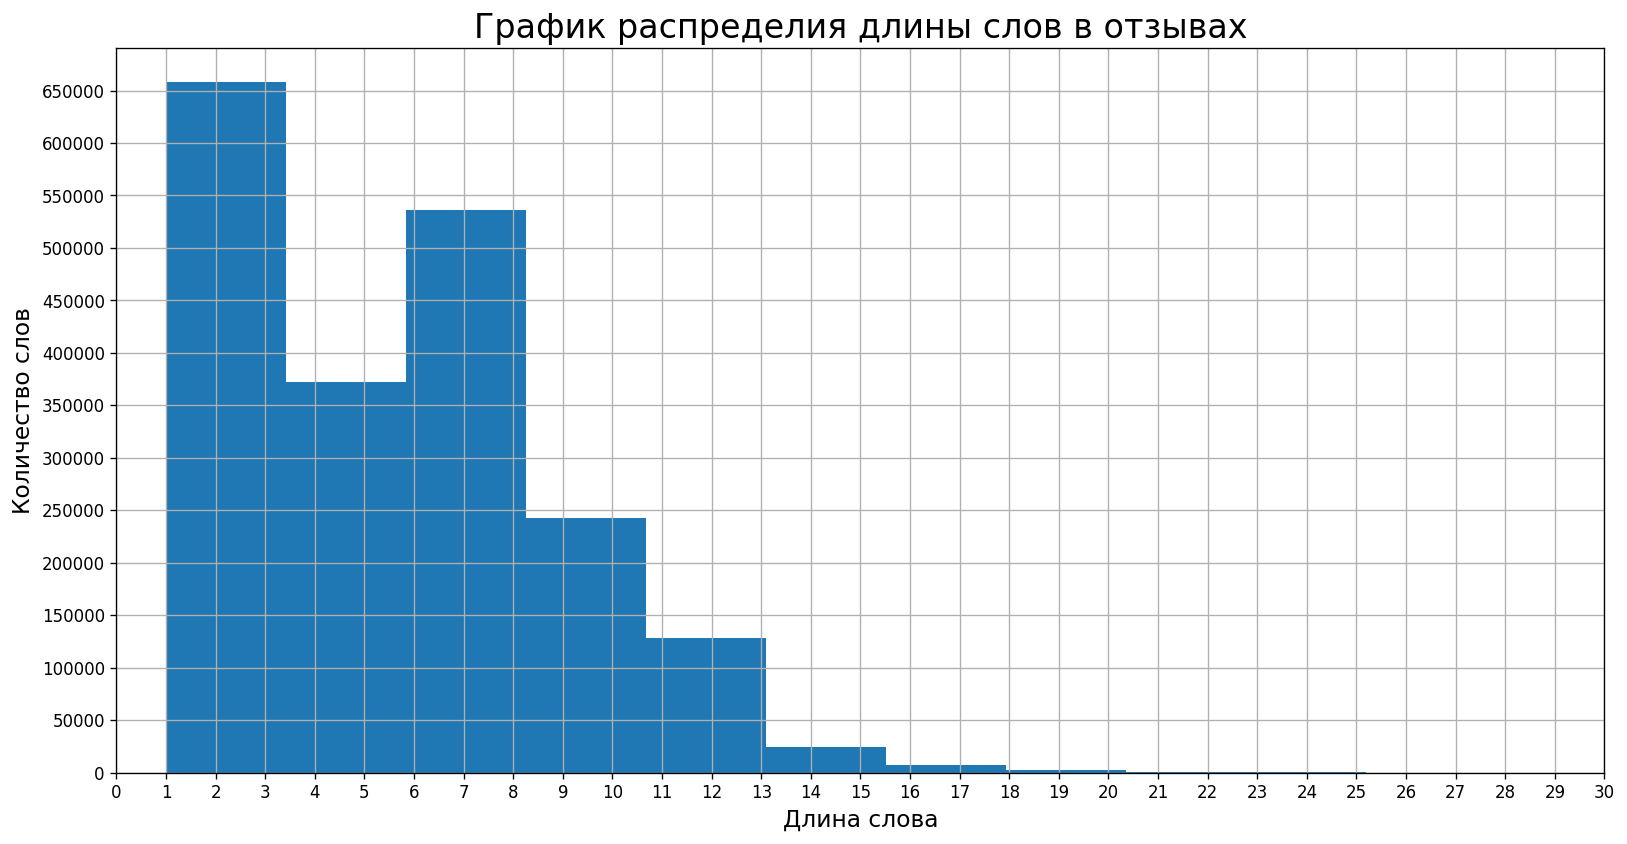

In [ ]:
plt.figure(figsize=(16,8), dpi= 120)
plt.hist(count_word,bins= 100)
plt.title('График распределия длины слов в отзывах', fontsize= 20)
plt.xlabel('Длина слова',fontsize=14)
plt.ylabel('Количество слов',fontsize=14)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(50000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,30)
plt.grid()
plt.show()

In [ ]:
# подсчитываем количество слов в каждом отзыве 
len_text = json_df['text'].apply(lambda x: len(x.split()))

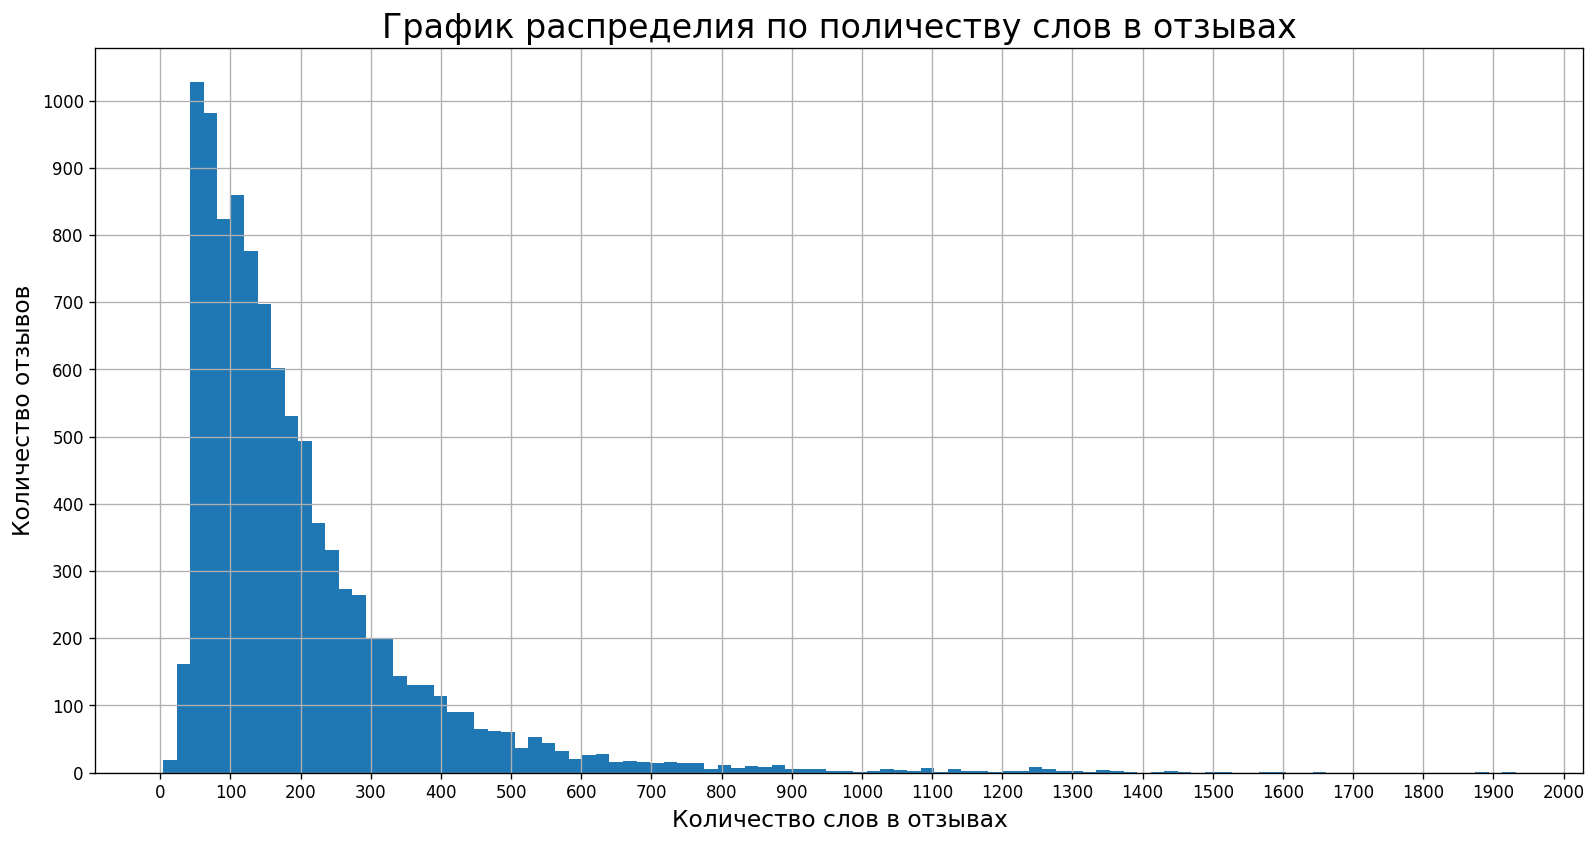

In [ ]:
plt.figure(figsize=(16,8), dpi= 120)
plt.hist(len_text, bins= 100)
plt.title('График распределия по поличеству слов в отзывах', fontsize= 20)
plt.xlabel('Количество слов в отзывах',fontsize=14)
plt.ylabel('Количество отзывов',fontsize=14)
x_major_locator=MultipleLocator(100)
y_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.grid()
plt.show()

**3) Найдите 10 самых частых:**
* слов

In [ ]:
from collections import Counter

In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation

In [ ]:
import re

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus = [token.lower() for text in json_df.text for token in word_tokenize(text) if token not in punctuation]
print(len(corpus))
corpus[:10]

1994634


['здравствуйте',
 'хотелось',
 'бы',
 'выразить',
 'благодарность',
 'банку',
 'втб24',
 'г.воронеж',
 'пл',
 'ленина']

In [ ]:
freq_dict = Counter(corpus)

In [ ]:
freq_dict.most_common(10)

[('в', 70062),
 ('и', 57854),
 ('не', 46391),
 ('на', 38434),
 ('что', 32948),
 ('я', 31135),
 ('с', 25897),
 ('по', 21183),
 ('мне', 17629),
 ('банка', 15864)]

* слов без стоп-слов

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
# функция возвращает только слова
def words_only(text):
    if re.findall("[А-Яа-я]+",text):
     return text 

In [ ]:
corpus2 = [words_only(word) for word in corpus if word not in stopwords.words('russian') and words_only(word) is not None ]

In [ ]:
corpus2[:10]

['здравствуйте',
 'хотелось',
 'выразить',
 'благодарность',
 'банку',
 'втб24',
 'г.воронеж',
 'пл',
 'ленина',
 'непосредственно']

In [ ]:
freq_dict2 = Counter(corpus2)

In [ ]:
freq_dict2.most_common(10)

[('банка', 15864),
 ('банк', 12440),
 ('это', 9509),
 ('деньги', 6453),
 ('карты', 5512),
 ('карту', 5298),
 ('кредит', 4737),
 ('день', 4463),
 ('банке', 3707),
 ('года', 3530)]

* лемм

In [ ]:
! pip install pymorphy2
import pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=b4574ab67eabae199f9d9c3e48e383d321ee8df60b85e5c917e8fd4f498cd3d8
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
m = pymorphy2.MorphAnalyzer()

In [ ]:
corpus3 = [m.parse(word)[0].normal_form for word in corpus2]

In [ ]:
corpus3[:10]

['здравствуйте',
 'хотеться',
 'выразить',
 'благодарность',
 'банк',
 'втб24',
 'г.воронеж',
 'пл',
 'ленин',
 'непосредственно']

In [ ]:
freq_dict3 = Counter(corpus3)

In [ ]:
freq_dict3.most_common(10)

[('банк', 37884),
 ('карта', 17573),
 ('это', 10411),
 ('мой', 10182),
 ('кредит', 9646),
 ('день', 9318),
 ('сотрудник', 8981),
 ('деньга', 8746),
 ('который', 8608),
 ('клиент', 7588)]

* существительных

In [ ]:
corpus4 = [word for word in corpus3 if m.parse(word)[0].tag.POS == 'NOUN']

In [ ]:
corpus4[:10]

['благодарность',
 'банк',
 'г.воронеж',
 'пл',
 'ленин',
 'специалист',
 'кредитование',
 'мещеряков',
 'юлия',
 'анатолиевич']

In [ ]:
freq_dict4 = Counter(corpus4)

In [ ]:
freq_dict4.most_common(10)

[('банк', 37884),
 ('карта', 17573),
 ('кредит', 9646),
 ('день', 9318),
 ('сотрудник', 8981),
 ('деньга', 8746),
 ('клиент', 7588),
 ('счёт', 7200),
 ('сумма', 6606),
 ('год', 6415)]

**4) Постройте кривые Ципфа и Хипса**

**Закон Ципфа**

Эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

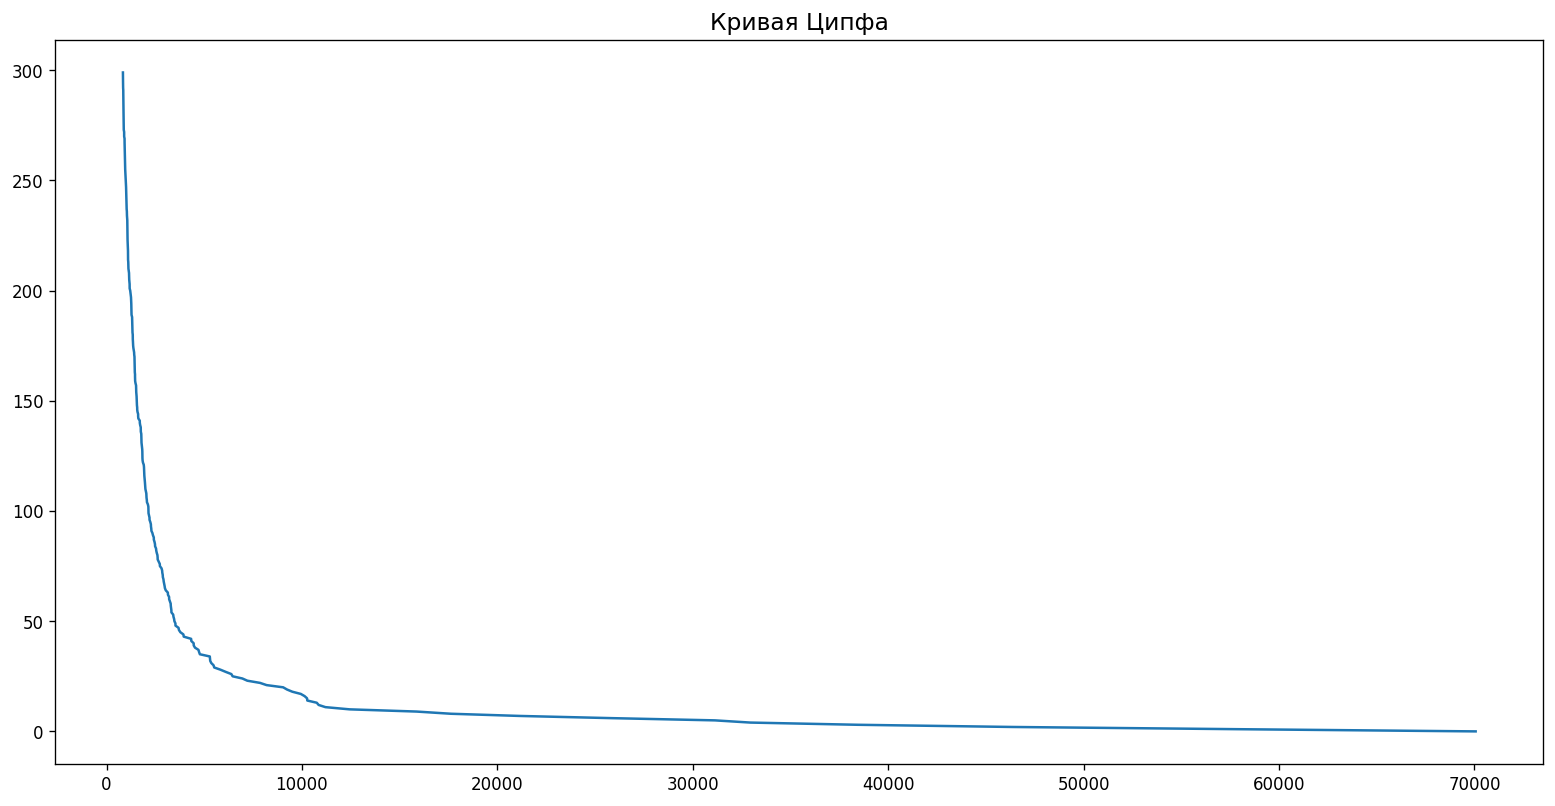

In [ ]:
freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots(figsize=(16,8), dpi= 120)
plt.title('Кривая Ципфа', fontsize=14)
ax.plot(freqs[:300], range(300))
plt.show()

**Закон Хипса**

С увеличением длины текста (количества токенов), количество слов увеличивается в соответствии с законом: $|V| = K*N^b$


$N$  –  число токенов, $|V|$  – количество слов в словаре, $K, b$  –  параметры, обычно $K \in [10,100], b \in [0.4, 0.6]$

Закон Хипса - обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

In [ ]:
from tqdm import tqdm

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(json_df.iterrows(), total = len(json_df)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))

100%|██████████| 10000/10000 [00:37<00:00, 264.44it/s]


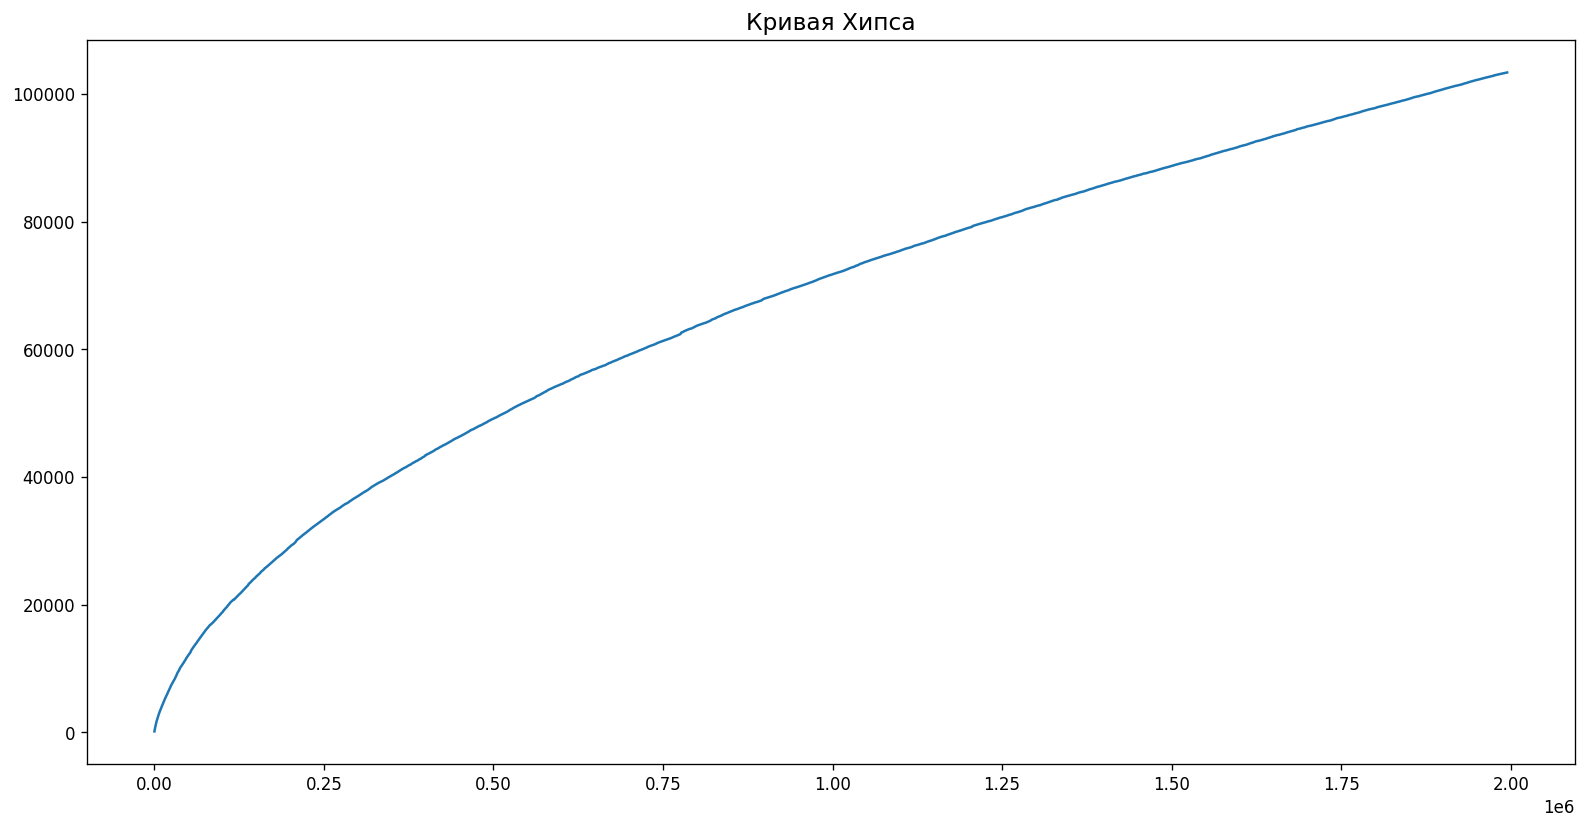

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), dpi= 120)
plt.title('Кривая Хипса', fontsize=14)
ax.plot(n_tokens, n_words)
plt.show()

**5) Ответьте на следующие вопросы:**
* какое слово встречается чаще, "сотрудник" или "клиент"?

In [ ]:
freq_dict4.most_common(10)

[('банк', 37884),
 ('карта', 17573),
 ('кредит', 9646),
 ('день', 9318),
 ('сотрудник', 8981),
 ('деньга', 8746),
 ('клиент', 7588),
 ('счёт', 7200),
 ('сумма', 6606),
 ('год', 6415)]

Ответ: чаще встречается слово "сотрудник"

* сколько раз встречается слова "мошенничество" и "доверие"?

In [ ]:
freq_dict4['мошенничество'] # 198 раз встречается слово мошенничество

198

In [ ]:
freq_dict4['доверие'] # 153 раз встречается слово доверие

153

**6) В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру tf - idf , для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# функция преобразует датафрейм в один документ
def text_to_doc(texts):
  doc = ''
  for text in texts:
    for word in text.split():
        if word not in stopwords.words('russian') and word not in punctuation:
           doc += ' ' + str(m.parse(word.lower())[0].normal_form)
  return  doc

In [ ]:
rating_1 = json_df['text'].where(json_df['rating_grade'] == 1.0).dropna()

In [ ]:
rating_1

3       1 июня 2015 в Москве в отделении по адресу Смо...
4       История очень долгая! Пришел я в банк (это раз...
10      В ИнтерБыстробанке удобно оплачивать ком. плат...
12      Вы хотя бы читали что пишут те, кому вы обязан...
13      Здравствуйте. Сразу скажу что отношение к сбер...
                              ...                        
9987    У мамы дважды "уводили пенсию с карты" уже пос...
9988    Случайно обнаружила  на сайте, что нужно прихо...
9994    Я пришла к выводу, что этот банк - самый дотош...
9997    В феврале 2015 года взял потребительский креди...
9998    Добрый день! в ноябре 2014 года при оплате штр...
Name: text, Length: 3734, dtype: object

In [ ]:
rating_5 = json_df['text'].where(json_df['rating_grade'] == 5.0).dropna()

In [ ]:
rating_5.head()

0     Здравствуйте!  Хотелось бы выразить благодарно...
9     Хочу поблагодарить Надежду из отдела по ипотеч...
31    Выплату из АСВ по Транспортному Банку пошел по...
40    В Куйбышевском филиале, в головном офисе прост...
84    Хочу выразить огромную благодарность сотрудник...
Name: text, dtype: object

In [ ]:
doc_r1 = text_to_doc(rating_1)

In [ ]:
doc_r5 = text_to_doc(rating_5)

* *Ключевые слова(униграммы)*

In [ ]:
tfidf = TfidfVectorizer(max_df = 0.7)

In [ ]:
tfidf_matrix= tfidf.fit_transform([doc_r1,doc_r5]).todense()

In [ ]:
feature_names = tfidf.get_feature_names_out()

In [ ]:
# функция выводит на печать 15 ключевых слов(n-грамм) по документам
# 0 - документ с отзывами с оценкой 1
# 1 - документ с отзывами с оценкой 5
def top_words(numer_doc):
  if numer_doc == 0:
    rating = 1
  elif numer_doc == 1:
    rating = 5  
  feature_index = tfidf_matrix[numer_doc,:].nonzero()[1]
  tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[numer_doc, x] for x in feature_index])
  res = dict(tfidf_scores)
  r = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse = True)}
  print(f'Ключевые слова для оценки {rating}')
  print()
  for _,i in zip(range(16),r.items()):
      print(i)

In [ ]:
top_words(0)

Ключевые слова для оценки 1

('прекратить', 0.1769541728390133)
('навязать', 0.14318429252622453)
('прокуратура', 0.14183349731371298)
('прокуратуру', 0.12427315955106279)
('указано', 0.11346679785097037)
('роспотребнадзор', 0.11211600263845882)
('отвечает', 0.10941441221343572)
('орган', 0.1067128217884126)
('бред', 0.10266043615087796)
('тишина', 0.09185407445078553)
('противный', 0.08780168881325087)
('яндекс', 0.08510009838822778)
('еда', 0.08374930317571622)
('законный', 0.08239850796320466)
('мать', 0.08239850796320466)
('грубо', 0.08104771275069313)


In [ ]:
top_words(1)

Ключевые слова для оценки 5

('доброжелательность', 0.3459137902343542)
('атмосфера', 0.2136526351447482)
('поощрить', 0.20347870013785543)
('процветания', 0.1729568951171771)
('чуткость', 0.12208722008271324)
('карьерный', 0.11191328507582048)
('роста', 0.09156541506203493)
('тфб', 0.09156541506203493)
('уютный', 0.09156541506203493)
('чувствоваться', 0.09156541506203493)
('быстрое', 0.08139148005514217)
('меченый', 0.08139148005514217)
('плодотворный', 0.08139148005514217)
('allairlines', 0.0712175450482494)
('выручать', 0.0712175450482494)
('заслуга', 0.0712175450482494)


* *Ключевые слова(биграммы и триграммы)*

In [ ]:
tfidf = TfidfVectorizer(max_df = 0.7, ngram_range=(2,3))

In [ ]:
tfidf_matrix= tfidf.fit_transform([doc_r1,doc_r5]).todense()

In [ ]:
feature_names = tfidf.get_feature_names_out()

In [ ]:
top_words(0)

Ключевые слова для оценки 1

('просить разобраться', 0.10163178315265187)
('персональный данных', 0.07107117702982649)
('гк рф', 0.06538548286744036)
('30 день', 0.05401409454266813)
('разобраться дать', 0.049039112150580266)
('защита право', 0.04619626506938721)
('полный досрочный', 0.04619626506938721)
('02 2015', 0.045485553299088946)
('ук рф', 0.044064129758492415)
('день звонить', 0.04264270621789589)
('дать ответ', 0.04122128267729936)
('средство размер', 0.040510570907001095)
('на какой', 0.039089147366404564)
('01 2015', 0.0383784355961063)
('30 04', 0.0383784355961063)
('противный случай', 0.03766772382580804)


In [ ]:
top_words(1)

Ключевые слова для оценки 5

('хотеть выразить благодарность', 0.19191109666665804)
('благодарность сотрудник', 0.14393332249999352)
('огромный благодарность', 0.09835443704166223)
('выразить благодарность сотрудник', 0.07196666124999676)
('выразить огромный', 0.057573328999997404)
('положительный отзыв', 0.057573328999997404)
('выразить огромный благодарность', 0.055174440291664184)
('поблагодарить сотрудник', 0.055174440291664184)
('быть приятно', 0.05037666287499773)
('хотеть выразить огромный', 0.05037666287499773)
('благодарность весь', 0.04078110804166483)
('особый благодарность', 0.04078110804166483)
('благодарность сотрудник банк', 0.0383822193333316)
('слово благодарность', 0.03598333062499838)
('хотеться выразить благодарность', 0.03598333062499838)
('очень довольна', 0.03358444191666515)


##Часть 2. Тематическое моделирование

**1) Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.**

In [ ]:
from gensim.models import lsimodel
from gensim.models import ldamulticore
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

In [ ]:
def pre_process(text): # функция для преобразования,очистки текста и лемматизации
  doc_out = []
  for token in word_tokenize(text):
    if token not in stopwords.words('russian') and token not in punctuation:
      doc_out = doc_out + [m.parse(token)[0].normal_form]
  return doc_out  

In [ ]:
texts = [pre_process(text) for text in json_df.text]

In [ ]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

**Тематическая модель LSI**

Латентно-семантический анализ, LSA (latent semantic analysis), он же LSI (latent semantic indexing) — самая ранняя модель, предложенная еще в конце 80-х гг. Модель называется латентной, т.к. предполагает введение скрытого (латентного) параметра — темы.

Алгоритм LSA группирует как документы, которые используют похожие слова, так и слова, которые встречаются в похожем наборе документов. Полученные кластеры в матрице используются для обнаружения латентных (скрытых) компонентов в исходных данных, соответствующих определённым тематикам.




In [ ]:
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)

In [ ]:
lsi.show_topics()

[(0,
  '0.178*"карта" + 0.130*"кредит" + 0.109*"вклад" + 0.107*"деньга" + 0.101*"счёт" + 0.099*"``" + 0.099*"\'\'" + 0.094*"сотрудник" + 0.092*"отделение" + 0.091*"мой"'),
 (1,
  '0.357*"вклад" + -0.226*"звонок" + -0.211*"номер" + 0.205*"карта" + -0.200*"кредит" + -0.170*"ваш" + -0.140*"телефон" + -0.132*"звонить" + 0.114*"деньга" + 0.113*"банкомат"'),
 (2,
  '-0.585*"вклад" + 0.269*"карта" + 0.166*"банкомат" + -0.158*"ставка" + -0.137*"договор" + 0.134*"сбербанк" + -0.125*"условие" + 0.109*"средство" + -0.105*"пополнение" + 0.103*"деньга"'),
 (3,
  '-0.351*"страховка" + -0.302*"кредит" + -0.278*"страхование" + 0.210*"номер" + 0.170*"вклад" + -0.164*"договор" + 0.155*"звонок" + -0.146*"страховой" + 0.127*"телефон" + -0.119*"сумма"'),
 (4,
  '0.277*"»" + 0.277*"«" + 0.197*"средство" + 0.181*"денежный" + 0.170*"договор" + 0.148*"вклад" + -0.131*"..." + 0.124*"счёт" + -0.123*"заявка" + -0.111*"очень"')]

Возможные темы:


0 - консультация сотрудника

1 - звонок в колл-центр

2 - условия по договору

3 - страхование

4 - консультация по заявке

**Тематическая модель LDA**

LDA (Latent Dirichlet Allocation), латентное размещение Дирихле — генеративная вероятностная модель корпуса текстов. Самая распространенная модель, разработана в 2002-2003 гг. Это следующий шаг в развитии тематических моделей, где устранены недостатки pLSA (легко переобучается; при добавлении документа в коллекцию надо все пересчитывать заново). Сейчас эта тематическая модель используется шире всего.

В LDA каждый документ может рассматриваться как набор случайных скрытых тем, где каждая тема определяется распределением слов, при этом каждое слово в конкретном документе можно отнести к одной из его тем. Подобный подход схож с pLSA с той разницей, что в LDA качестве априорного распределения для тем используется распределение Дирихле. Это улучшает качество получающихся тем.

In [ ]:
lda_model = ldamulticore.LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=3)

In [ ]:
lda_model.show_topics()

[(0,
  '0.002*"вклад" + 0.002*"карта" + 0.002*"\'\'" + 0.001*"``" + 0.001*"кредит" + 0.001*"деньга" + 0.001*"счёт" + 0.001*"договор" + 0.001*"отделение" + 0.001*"сумма"'),
 (1,
  '0.002*"кредит" + 0.002*"карта" + 0.002*"номер" + 0.002*"звонок" + 0.002*"ваш" + 0.001*"мой" + 0.001*"сотрудник" + 0.001*"телефон" + 0.001*"счёт" + 0.001*"деньга"'),
 (2,
  '0.003*"карта" + 0.002*"кредит" + 0.002*"отделение" + 0.002*"деньга" + 0.001*"платёж" + 0.001*"сотрудник" + 0.001*"сбербанк" + 0.001*"``" + 0.001*"счёт" + 0.001*"\'\'"')]

Возможные темы:

0 - колл-центр

1 - консультация сотрудника

2 - банковский продукт

Так как в датасете отзывы клиентов, а клиенты чаще всего оставляют негативные отзывы, то любая из тем приведенных выше скорее будет интерпретироваться в негативную сторону. Например если были упомянуты "сотрудник" и "офис", то скорее всего это недовольство сотрудником офиса банка, а если "звонок","колл-центр", то скорее всего, что после обращения в колл-центр вопрос не решился.  

*Визуализируем тематическую модель LDA чтобы посмотреть на сколько качественное произошло разделение по тематикам*

In [ ]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.008716  0.008848       1        1  36.721821
1     -0.013869  0.001658       2        1  34.663918
0      0.005153 -0.010506       3        1  28.614261, topic_info=              Term        Freq       Total Category  logprob  loglift
1493         вклад  122.000000  122.000000  Default  30.0000  30.0000
317         звонок   83.000000   83.000000  Default  29.0000  29.0000
3652       удалить   20.000000   20.000000  Default  28.0000  28.0000
642   персональный   30.000000   30.000000  Default  27.0000  27.0000
165          номер   92.000000   92.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
56           очень   20.944751   73.257659   Topic3  -6.9734  -0.0008
87             это   21.459329   82.403554   Topic3  -6.9491  -0.0942
144        который   21.228855   80.927100   Topic3  -6.9599  -0.0869
624      кредитный   21.319131   86.547822   Topic3  -6.9557  -0.1498
293            год   21.035105   80.549641   Topic3  -6.9691  -0.0914

[296 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.352631        ''
0         2  0.333570        ''
0         3  0.324039        ''
2655      1  0.727453        --
2655      2  0.121242        --
...     ...       ...       ...
259       3  0.271344         я
89        1  0.327622  являться
89        2  0.431081  являться
89        3  0.241406  являться
1465      2  0.848230      №152

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

Судя по построенной визуализации, темы определены достаточно не плохо, так как они не пересекаются и расположены далеко друг от друга. Попробуем улучшить модель и подберем оптимальное количество тематик. Будем использовать оценку согласованности UMass. Она вычисляет, как часто два слова $w_{i}$ и $w_{j}$ появляются вместе в корпусе.

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
coherence_values = []
for num_topics in range(3, 30, 2):
    model = ldamulticore.LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics = num_topics)
    coherence_model_lda = CoherenceModel(model= model, texts = texts, dictionary=dictionary, coherence='u_mass')
    coherence_values.append(coherence_model_lda.get_coherence())

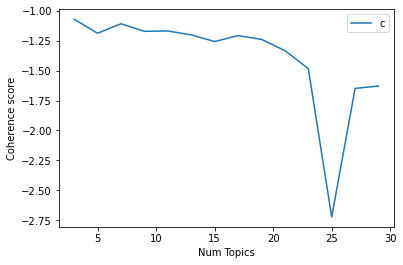

In [ ]:
x = range(3, 30, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, u_mass in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(u_mass, 4))

Num Topics = 3  has Coherence Value of -1.0704
Num Topics = 5  has Coherence Value of -1.1875
Num Topics = 7  has Coherence Value of -1.1082
Num Topics = 9  has Coherence Value of -1.1715
Num Topics = 11  has Coherence Value of -1.1685
Num Topics = 13  has Coherence Value of -1.2011
Num Topics = 15  has Coherence Value of -1.2571
Num Topics = 17  has Coherence Value of -1.2071
Num Topics = 19  has Coherence Value of -1.239
Num Topics = 21  has Coherence Value of -1.3325
Num Topics = 23  has Coherence Value of -1.4826
Num Topics = 25  has Coherence Value of -2.7228
Num Topics = 27  has Coherence Value of -1.6483
Num Topics = 29  has Coherence Value of -1.6289


*Если u_mass ближе к значению 0, это означает идеальную согласованность, и оно колеблется в любую сторону от значения 0, в зависимости от количества выбранных тем и типа данных, используемых для выполнения кластеризации тем. Ближе всего к 0 количество тем 3, получается, что изначально модель обучена с наилучшим количеством тем.*

**2) Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить?**

Скорее всего названия банков будут встречаться в случае большой популярности использования клиентами определенных продуктов конкретного банка.

##Часть 3. Классификация текстов

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5).

**1) Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое.**

Чтобы сбалансировать классы возьмем по 1000 строк соответсвующих оценке 1 и 5

In [ ]:
df_rating1 = json_df[['text','rating_grade']].where((json_df['rating_grade'] == 1.0)).dropna()[:1000]

In [ ]:
df_rating1.head()

,text,rating_grade
3,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,История очень долгая! Пришел я в банк (это раз...,1.0
10,В ИнтерБыстробанке удобно оплачивать ком. плат...,1.0
12,"Вы хотя бы читали что пишут те, кому вы обязан...",1.0
13,Здравствуйте. Сразу скажу что отношение к сбер...,1.0


In [ ]:
df_rating5 = json_df[['text','rating_grade']].where((json_df['rating_grade'] == 5.0)).dropna()[:1000]

In [ ]:
df_rating5.head()

,text,rating_grade
0,Здравствуйте! Хотелось бы выразить благодарно...,5.0
9,Хочу поблагодарить Надежду из отдела по ипотеч...,5.0
31,Выплату из АСВ по Транспортному Банку пошел по...,5.0
40,"В Куйбышевском филиале, в головном офисе прост...",5.0
84,Хочу выразить огромную благодарность сотрудник...,5.0


In [ ]:
df_rating = pd.concat([df_rating1,df_rating5]).reset_index(drop=True)

In [ ]:
df_rating.head()

,text,rating_grade
0,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
1,История очень долгая! Пришел я в банк (это раз...,1.0
2,В ИнтерБыстробанке удобно оплачивать ком. плат...,1.0
3,"Вы хотя бы читали что пишут те, кому вы обязан...",1.0
4,Здравствуйте. Сразу скажу что отношение к сбер...,1.0


In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          2000 non-null   object 
 1   rating_grade  2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_rating.text, df_rating.rating_grade, test_size= 0.2, shuffle= True, random_state = 42)

**2) Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных n - грам.**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

* **Униграммы**

In [ ]:
vec1 = CountVectorizer(ngram_range=(1, 1))

In [ ]:
bow1 = vec1.fit_transform(X_train)

In [ ]:
clf_uni = LogisticRegression(random_state=42)

In [ ]:
clf_uni.fit(bow1, y_train)

LogisticRegression(random_state=42)

In [ ]:
pred = clf_uni.predict(vec1.transform(X_test))

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.92      0.92      0.92       199
         5.0       0.92      0.92      0.92       201

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Использование униграмм дает хорошие метрики

* **Биграммы и триграммы**

In [ ]:
vec2_3 = CountVectorizer(ngram_range=(2, 3))

In [ ]:
bow2_3 = vec2_3.fit_transform(X_train)

In [ ]:
clf2_3 = LogisticRegression(random_state=42)

In [ ]:
clf2_3.fit(bow2_3, y_train)

LogisticRegression(random_state=42)

In [ ]:
pred2 = clf2_3.predict(vec2_3.transform(X_test))

In [ ]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

         1.0       0.74      0.92      0.82       160
         5.0       0.94      0.78      0.85       240

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.86      0.84      0.84       400



При использовании двуграмм и триграмм метрики ухудшились

* **Cимвольные униграммы и биграммы**

In [ ]:
vec_simbol = CountVectorizer(ngram_range=(1, 2),analyzer='char')

In [ ]:
bow_simbol = vec_simbol.fit_transform(X_train)

In [ ]:
clf_simbol = LogisticRegression(random_state=42)

In [ ]:
clf_simbol.fit(bow_simbol, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
pred_sim = clf_simbol.predict(vec_simbol.transform(X_test))

In [ ]:
print(classification_report(pred_sim, y_test))

              precision    recall  f1-score   support

         1.0       0.89      0.90      0.89       197
         5.0       0.90      0.89      0.90       203

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



Рузультат лучше, чем при обучении на биграммах и триграммах , но хуже чем на униграммах

**3) Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:**

* 1-ый вариант:  преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый семантический анализ) (sklearn.decomposition.TruncatedSVD),

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
clf_lsa = Pipeline([ 
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('tm', TruncatedSVD()), 
    ('clf', LogisticRegression(random_state=42))
])

In [ ]:
clf_lsa.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('tm', TruncatedSVD()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
pred_lsa = clf_lsa.predict(X_test)

In [ ]:
print(classification_report(pred_lsa, y_test))

              precision    recall  f1-score   support

         1.0       0.92      0.83      0.87       221
         5.0       0.81      0.91      0.86       179

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.86       400
weighted avg       0.87      0.86      0.87       400



* 2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation). Используйте accuracy и F-measure для оценки качества классификации

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
clf_lda = Pipeline([ 
    ('vect', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('tm', LatentDirichletAllocation()), 
    ('clf', LogisticRegression(random_state=42))
])

In [ ]:
clf_lda.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('tm', LatentDirichletAllocation()),
                ('clf', LogisticRegression(random_state=42))])

In [ ]:
pred_lda = clf_lda.predict(X_test)

In [ ]:
print(classification_report(pred_lda, y_test))

              precision    recall  f1-score   support

         1.0       0.93      0.53      0.68       348
         5.0       0.19      0.73      0.30        52

    accuracy                           0.56       400
   macro avg       0.56      0.63      0.49       400
weighted avg       0.83      0.56      0.63       400



При использовании LSA и LDA качество модели ухудшилось. Лучшие метрики у модели логистической регрессии с векторизацией текста униграммами.  